In [1]:
from dataclasses import replace
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.special import entr
from sklearn.metrics import accuracy_score
import operator
from sklearn.metrics import confusion_matrix
from Plots import PlotConfMatrix

In [2]:
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

# load the data
iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

In [3]:
# use PCA to reduce the dimensions for visualization
pca = PCA(n_components=2)
transformed_iris = pca.fit_transform(X=X_raw)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

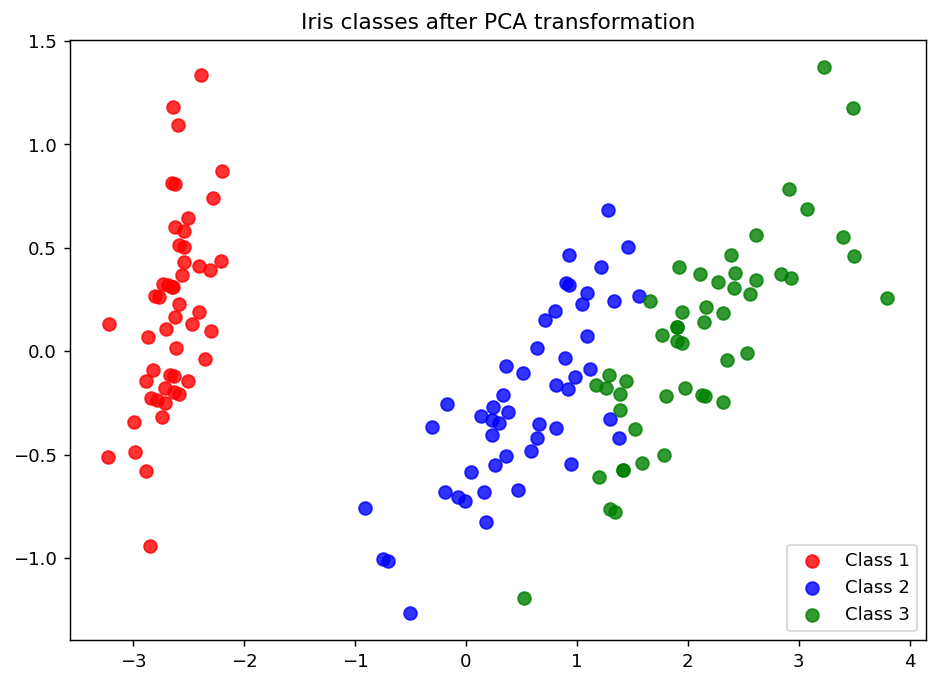

In [4]:
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component[y_raw==0], y_component[y_raw==0], color='red',s=50, alpha=8/10, label='Class 1')
plt.scatter(x_component[y_raw==1], y_component[y_raw==1], color='blue',s=50, alpha=8/10, label='Class 2')
plt.scatter(x_component[y_raw==2], y_component[y_raw==2], color='green',s=50, alpha=8/10, label='Class 3')
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
plt.gca().legend(loc="lower right")
#plt.legend(loc="upper left")
plt.title('Iris classes after PCA transformation')
plt.savefig('OriginalIrisData.svg')
plt.savefig('OriginalIrisData.pdf')
plt.show()

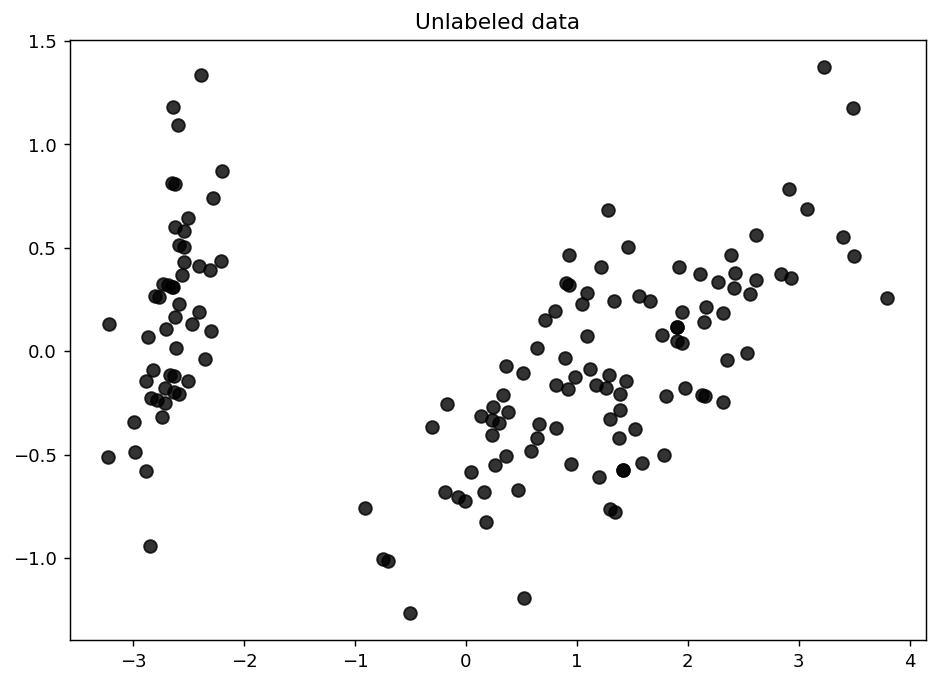

In [5]:
# plot data without labels (unlabeled data)
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='black',s=50, alpha=8/10, label='Class 1')
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
#plt.gca().legend(loc="lower right")
plt.title('Unlabeled data')
plt.savefig('OriginalIrisUnData.svg')
plt.savefig('OriginalIrisUnData.pdf')
plt.show()
n_labeled_examples = X_raw.shape[0]

In [6]:
# pick three points randomly and make their labels available (initial training data)
training_indices=np.random.permutation(n_labeled_examples-1)[0:3]
print(training_indices)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

[ 72 112 131]


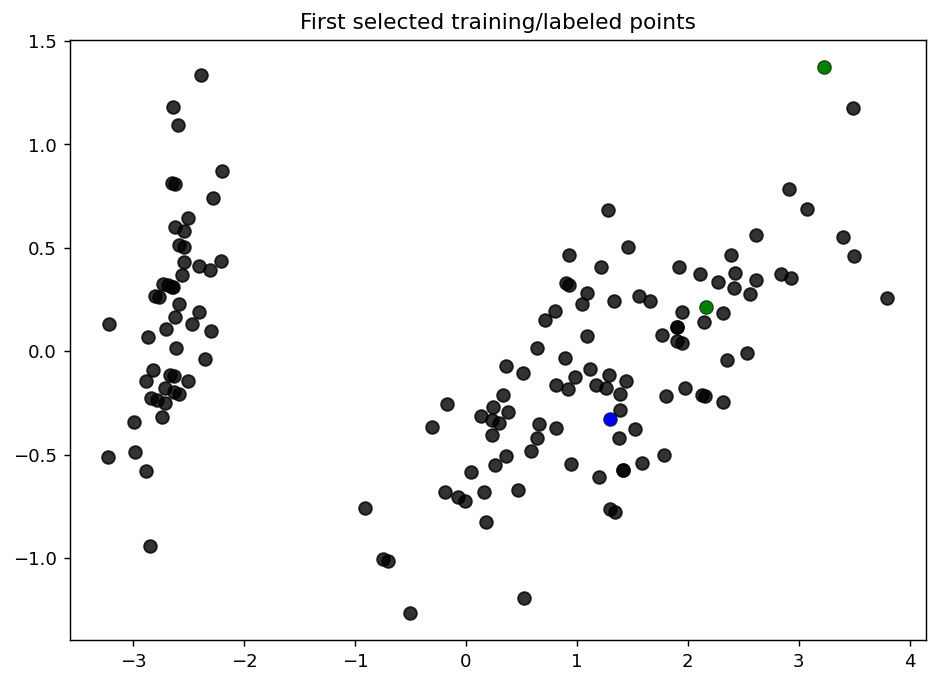

In [7]:
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='black',s=50, alpha=8/10, label='Class 1')
#plt.scatter(x=x_component[training_indices], y=y_component[training_indices], color='yellow', cmap='viridis', marker='o')
for i in range(3):
    if y_train[i]==0:
        plt.scatter(x=x_component[training_indices[i]], y=y_component[training_indices[i]], color='red', cmap='viridis', marker='o')
    elif y_train[i]==1:
        plt.scatter(x=x_component[training_indices[i]], y=y_component[training_indices[i]], color='blue', cmap='viridis', marker='o')
    else:
        plt.scatter(x=x_component[training_indices[i]], y=y_component[training_indices[i]], color='green', cmap='viridis', marker='o')        
plt.title('First selected training/labeled points')
plt.savefig('FirstSelectedData.svg')
plt.savefig('FirstSelectedData.pdf')
plt.show()

[[0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.725 0.275]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.53  0.47 ]
 [0.37  0.63 ]
 [0.53  0.47 ]
 [0.47  0.53 ]
 [0.725 0.275]
 [0.63  0.37 ]
 [0.63  0.37 ]
 [0.53  0.47 ]
 [0.725 0.275]
 [0.47  0.53 ]
 [0.725 0.275]
 [0.725 0.275]
 [0.63  0.37 ]
 [0.725 0.275]
 [0.63  0.37 ]
 [0.63  0.37 ]
 [0.47  0.53 ]
 [0.63  0.

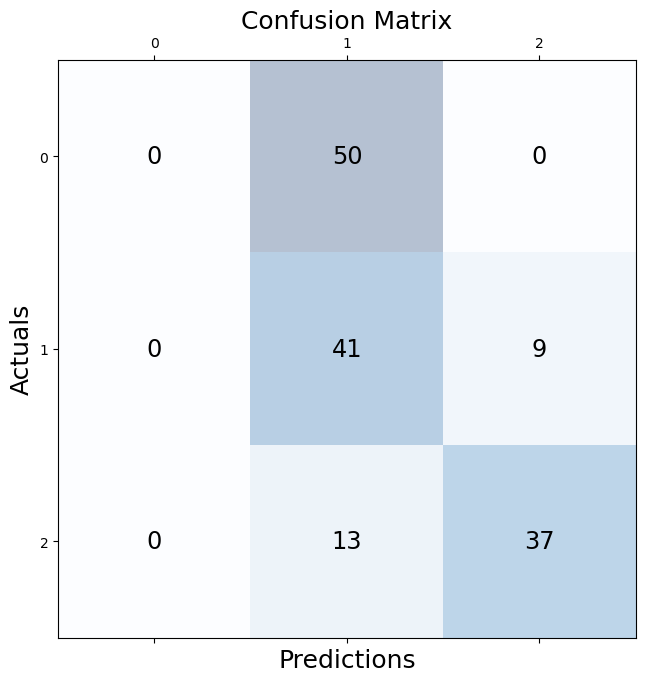

In [8]:
# use a learning model (Random Forest) to select one uncertain point
clf = RandomForestClassifier(max_depth = 4, min_samples_split=2, n_estimators = 200, random_state = 1) 
clf.fit(X_train, y_train) 
predictions = clf.predict(X_raw) 
#predictions = clf.predict(X_pool) 
unqueried_score= np.array(accuracy_score(predictions, y_raw))
#unqueried_score= np.array(accuracy_score(predictions, y_pool))
predicted_probs = clf.predict_proba(X_pool) 
print(predicted_probs) 
entropy_array = entr(predicted_probs).sum(axis=1)
query_index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
print('The most uncertain point is No.', query_index)
conf_matrix=confusion_matrix(y_raw, predictions)
PlotConfMatrix(conf_matrix, 'Confusion_Matrix', 0) 

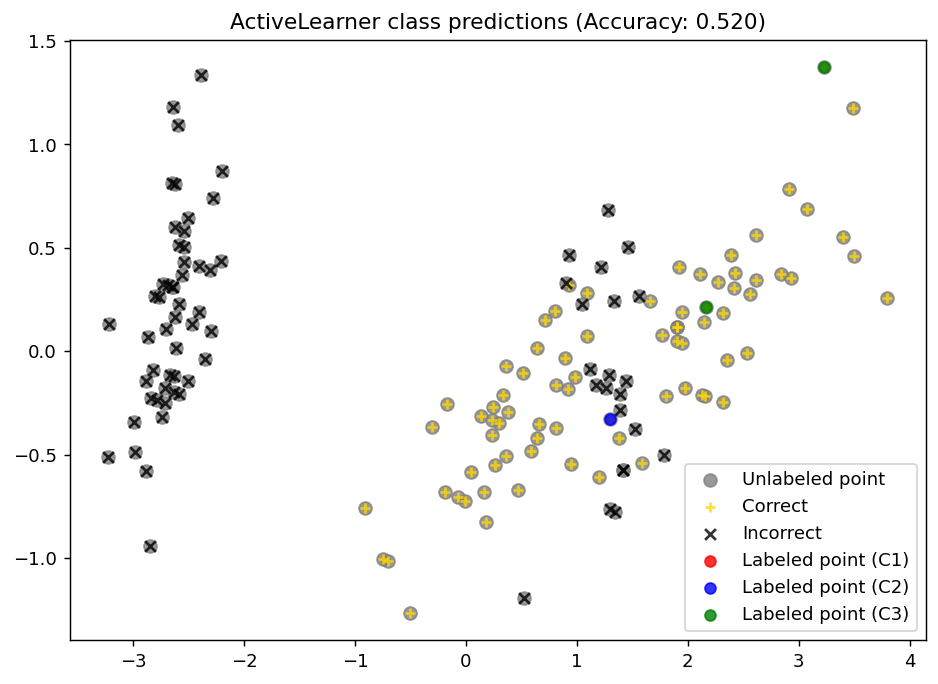

In [9]:
is_correct = (predictions == y_raw)
#is_correct = (predictions == y_pool)
# Plot our classification results.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x_component, y_component, color='gray',s=50, alpha=8/10, label='Unlabeled point')
plt.scatter(x=x_component[is_correct],  y=y_component[is_correct],  color='gold', marker='+', label='Correct',   alpha=8/10)
plt.scatter(x=x_component[~is_correct], y=y_component[~is_correct], color='black', marker='x', label='Incorrect', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==0]], y=y_component[training_indices[y_raw[training_indices]==0]], c='red', marker='o', label='Labeled point (C1)', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==1]], y=y_component[training_indices[y_raw[training_indices]==1]], c='blue', marker='o', label='Labeled point (C2)', alpha=8/10)
plt.scatter(x=x_component[training_indices[y_raw[training_indices]==2]], y=y_component[training_indices[y_raw[training_indices]==2]], c='green', marker='o', label='Labeled point (C3)', alpha=8/10)
plt.title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.legend(loc='lower right')
plt.savefig('FirstSelectedPerformanec.svg')
plt.savefig('FirstSelectedPerformanec.pdf')
plt.show()

[[0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.725 0.275]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.51  0.49 ]
 [0.31  0.69 ]
 [0.38  0.62 ]
 [0.335 0.665]
 [0.725 0.275]
 [0.405 0.595]
 [0.535 0.465]
 [0.51  0.49 ]
 [0.725 0.275]
 [0.335 0.665]
 [0.595 0.405]
 [0.725 0.275]
 [0.535 0.465]
 [0.725 0.275]
 [0.535 0.465]
 [0.535 0.465]
 [0.335 0.665]
 [0.535 0.

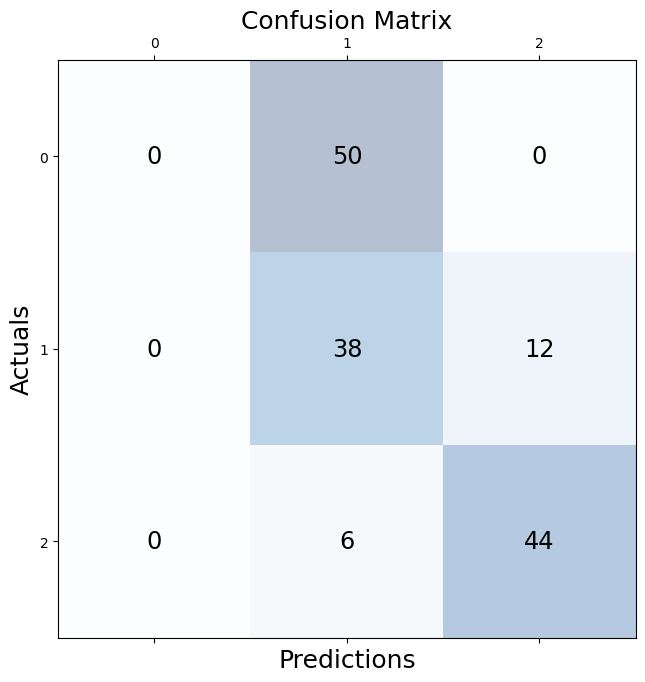

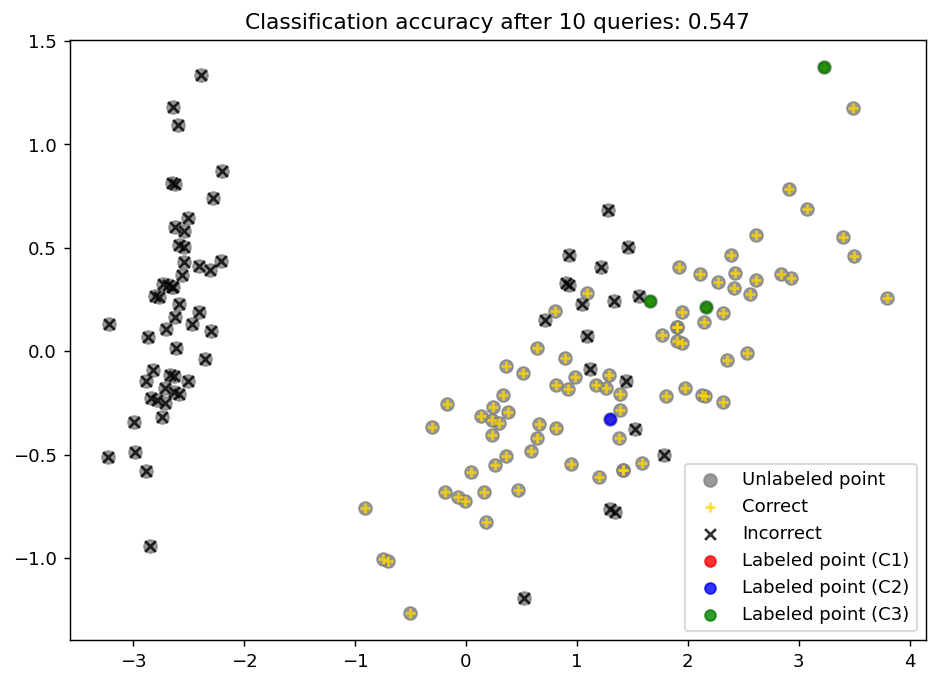

Accuracy after query 1: 0.5467
[[0.545 0.285 0.17 ]
 [0.61  0.215 0.175]
 [0.605 0.225 0.17 ]
 [0.63  0.21  0.16 ]
 [0.615 0.21  0.175]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.545 0.285 0.17 ]
 [0.605 0.225 0.17 ]
 [0.615 0.21  0.175]
 [0.63  0.21  0.16 ]
 [0.545 0.285 0.17 ]
 [0.545 0.285 0.17 ]
 [0.475 0.29  0.235]
 [0.615 0.21  0.175]
 [0.615 0.21  0.175]
 [0.63  0.21  0.16 ]
 [0.615 0.21  0.175]
 [0.615 0.21  0.175]
 [0.63  0.21  0.16 ]
 [0.615 0.21  0.175]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.545 0.285 0.17 ]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.61  0.215 0.175]
 [0.605 0.225 0.17 ]
 [0.63  0.21  0.16 ]
 [0.615 0.21  0.175]
 [0.615 0.21  0.175]
 [0.605 0.225 0.17 ]
 [0.61  0.215 0.175]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.545 0.285 0.17 ]
 [0.63  0.21  0.16 ]
 [0.63  0.21  0.16 ]
 [0.525 0.38  0.095]
 [0.61  0.215 0.175]
 [0.63  0.21  0.16 ]
 [0.615 0.21  0.175]
 [0.545 0.285 0.17 ]
 [0.615 0.21  0.175]
 [0

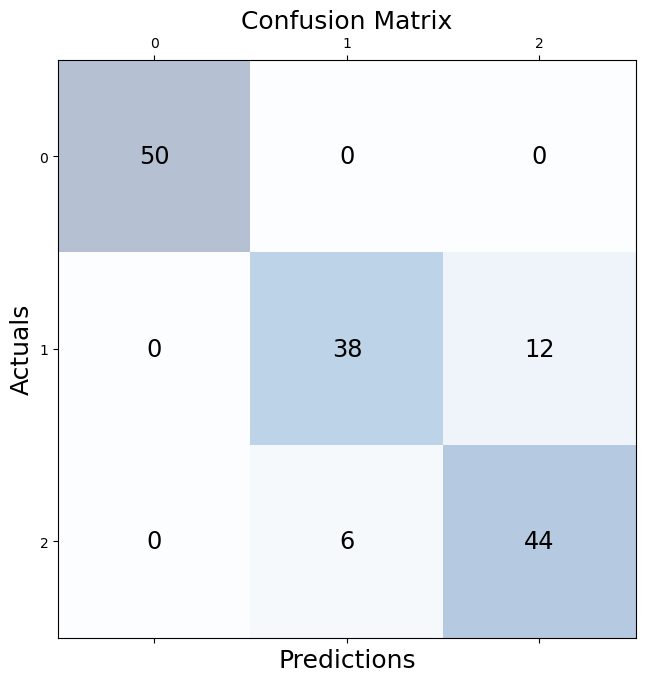

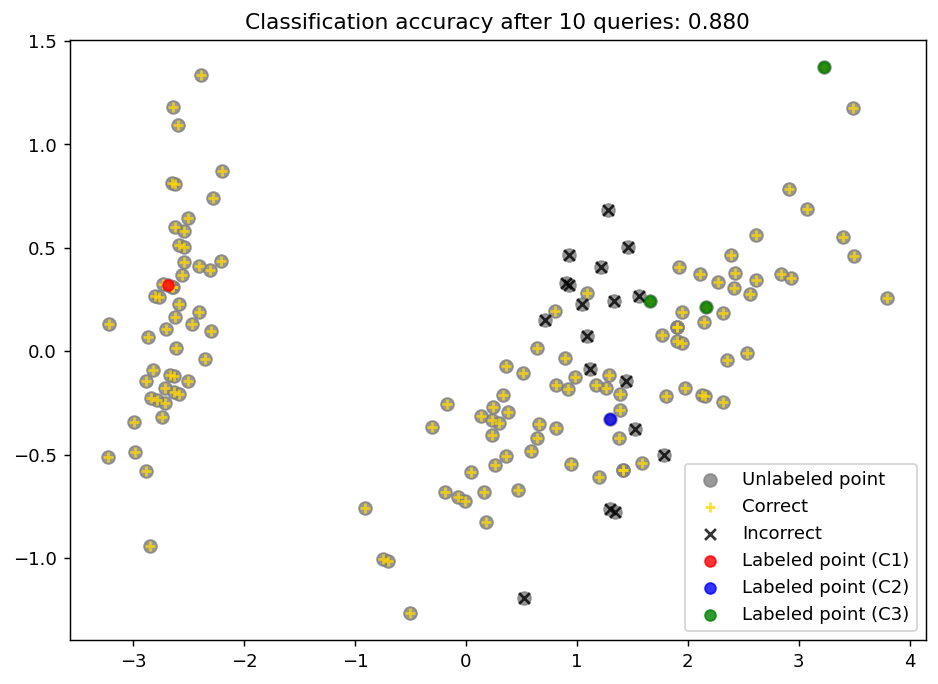

Accuracy after query 2: 0.8800
[[0.72  0.195 0.085]
 [0.795 0.125 0.08 ]
 [0.78  0.135 0.085]
 [0.86  0.08  0.06 ]
 [0.895 0.08  0.025]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.72  0.195 0.085]
 [0.78  0.135 0.085]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.72  0.195 0.085]
 [0.72  0.195 0.085]
 [0.895 0.08  0.025]
 [0.895 0.08  0.025]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.855 0.085 0.06 ]
 [0.86  0.08  0.06 ]
 [0.72  0.195 0.085]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.795 0.125 0.08 ]
 [0.78  0.135 0.085]
 [0.86  0.08  0.06 ]
 [0.895 0.08  0.025]
 [0.895 0.08  0.025]
 [0.78  0.135 0.085]
 [0.795 0.125 0.08 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.72  0.195 0.085]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.685 0.24  0.075]
 [0.795 0.125 0.08 ]
 [0.86  0.08  0.06 ]
 [0.86  0.08  0.06 ]
 [0.72  0.195 0.085]
 [0.86  0.08  0.06 ]
 [0.795 0.125 0.08 ]
 [0

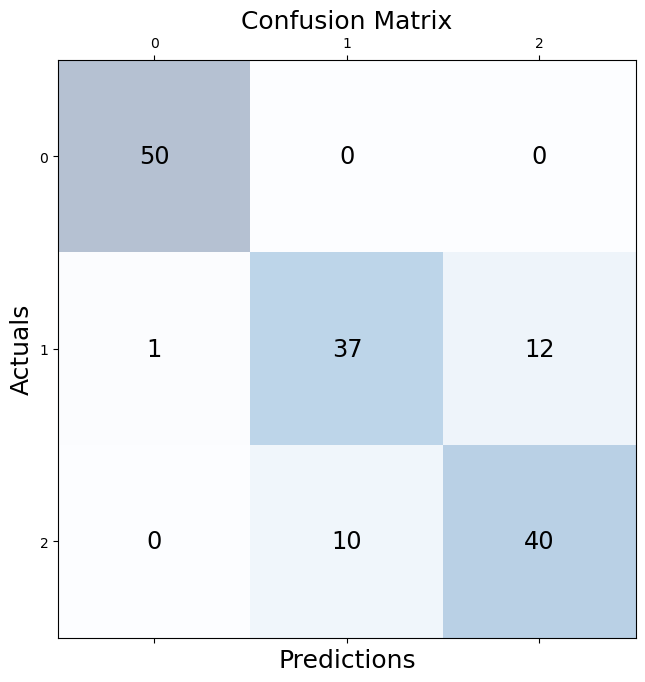

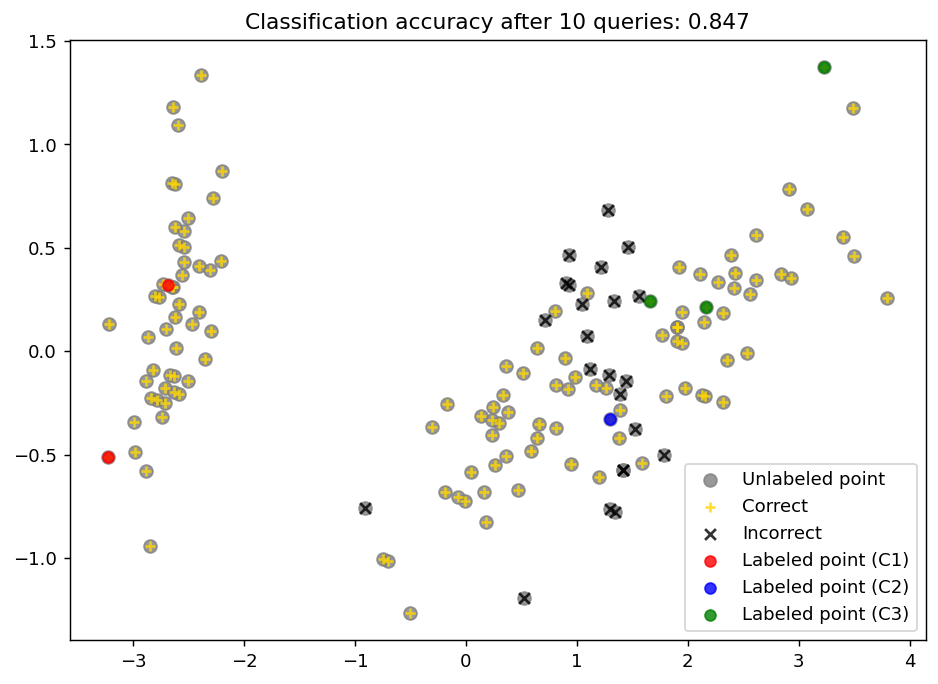

Accuracy after query 3: 0.8467
[[0.725 0.25  0.025]
 [0.735 0.24  0.025]
 [0.735 0.24  0.025]
 [0.85  0.14  0.01 ]
 [0.9   0.09  0.01 ]
 [0.76  0.23  0.01 ]
 [0.76  0.23  0.01 ]
 [0.725 0.25  0.025]
 [0.735 0.24  0.025]
 [0.85  0.13  0.02 ]
 [0.76  0.23  0.01 ]
 [0.725 0.25  0.025]
 [0.725 0.25  0.025]
 [0.855 0.135 0.01 ]
 [0.9   0.09  0.01 ]
 [0.85  0.14  0.01 ]
 [0.84  0.14  0.02 ]
 [0.885 0.095 0.02 ]
 [0.76  0.23  0.01 ]
 [0.85  0.13  0.02 ]
 [0.85  0.14  0.01 ]
 [0.76  0.23  0.01 ]
 [0.76  0.23  0.01 ]
 [0.725 0.25  0.025]
 [0.76  0.23  0.01 ]
 [0.85  0.14  0.01 ]
 [0.76  0.23  0.01 ]
 [0.735 0.24  0.025]
 [0.735 0.24  0.025]
 [0.76  0.23  0.01 ]
 [0.9   0.09  0.01 ]
 [0.9   0.09  0.01 ]
 [0.735 0.24  0.025]
 [0.735 0.24  0.025]
 [0.85  0.14  0.01 ]
 [0.85  0.14  0.01 ]
 [0.725 0.25  0.025]
 [0.76  0.23  0.01 ]
 [0.85  0.14  0.01 ]
 [0.715 0.27  0.015]
 [0.735 0.24  0.025]
 [0.85  0.14  0.01 ]
 [0.885 0.095 0.02 ]
 [0.725 0.25  0.025]
 [0.885 0.095 0.02 ]
 [0.735 0.24  0.025]
 [0

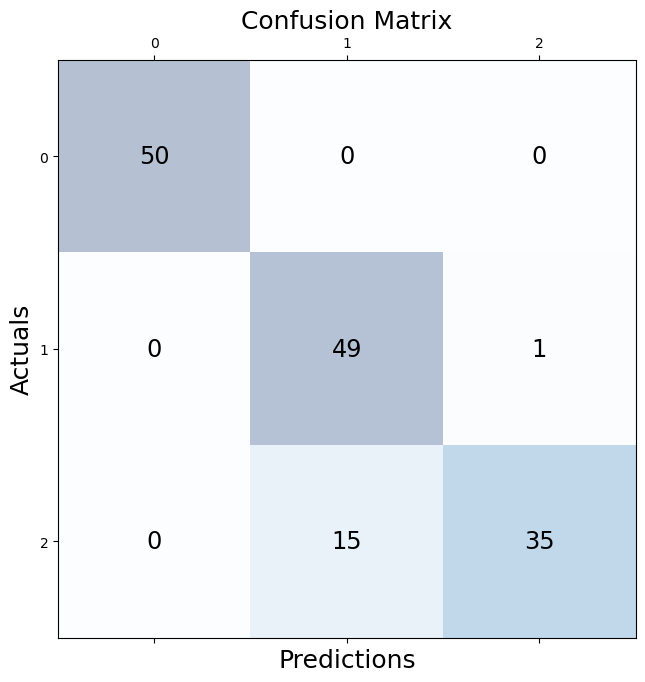

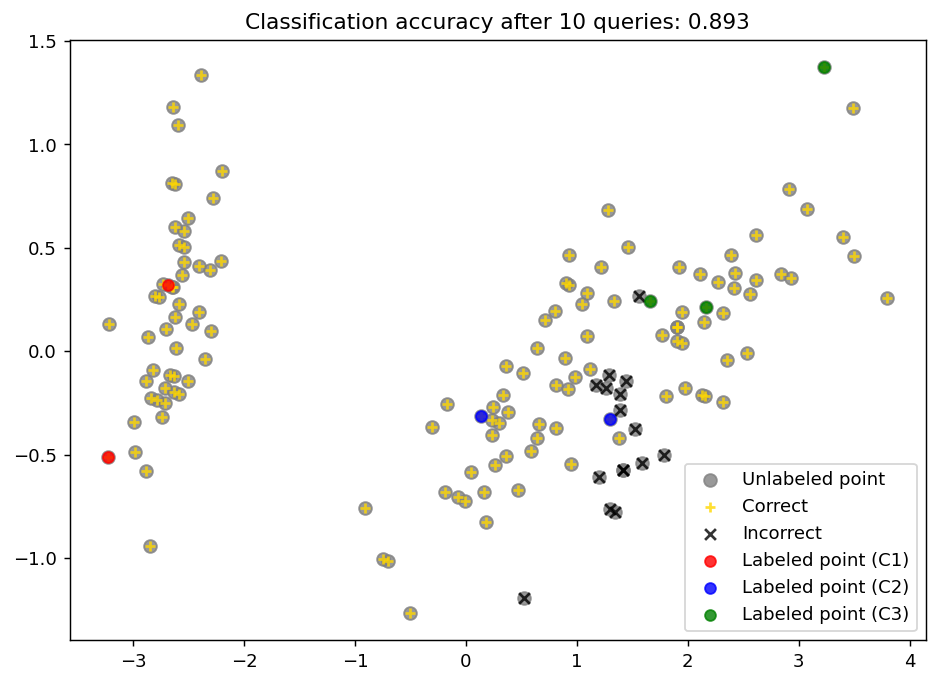

Accuracy after query 4: 0.8933
[[0.655 0.295 0.05 ]
 [0.69  0.265 0.045]
 [0.685 0.265 0.05 ]
 [0.82  0.165 0.015]
 [0.885 0.1   0.015]
 [0.73  0.255 0.015]
 [0.73  0.255 0.015]
 [0.655 0.295 0.05 ]
 [0.685 0.265 0.05 ]
 [0.82  0.16  0.02 ]
 [0.73  0.255 0.015]
 [0.655 0.295 0.05 ]
 [0.655 0.295 0.05 ]
 [0.81  0.17  0.02 ]
 [0.885 0.1   0.015]
 [0.82  0.165 0.015]
 [0.785 0.195 0.02 ]
 [0.86  0.125 0.015]
 [0.73  0.255 0.015]
 [0.82  0.16  0.02 ]
 [0.82  0.165 0.015]
 [0.73  0.255 0.015]
 [0.73  0.255 0.015]
 [0.655 0.295 0.05 ]
 [0.73  0.255 0.015]
 [0.82  0.165 0.015]
 [0.73  0.255 0.015]
 [0.69  0.265 0.045]
 [0.685 0.265 0.05 ]
 [0.73  0.255 0.015]
 [0.885 0.1   0.015]
 [0.865 0.115 0.02 ]
 [0.685 0.265 0.05 ]
 [0.69  0.265 0.045]
 [0.8   0.18  0.02 ]
 [0.82  0.165 0.015]
 [0.655 0.295 0.05 ]
 [0.73  0.255 0.015]
 [0.82  0.165 0.015]
 [0.645 0.315 0.04 ]
 [0.69  0.265 0.045]
 [0.82  0.165 0.015]
 [0.86  0.125 0.015]
 [0.655 0.295 0.05 ]
 [0.86  0.125 0.015]
 [0.69  0.265 0.045]
 [0

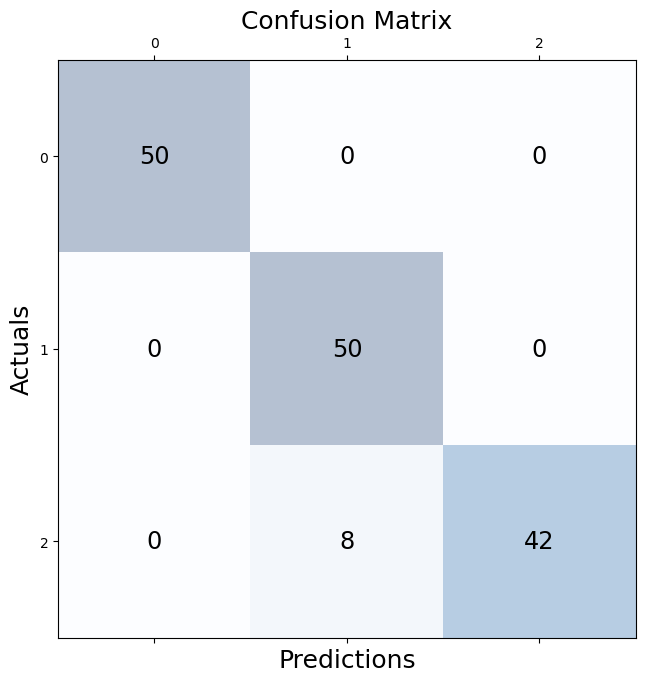

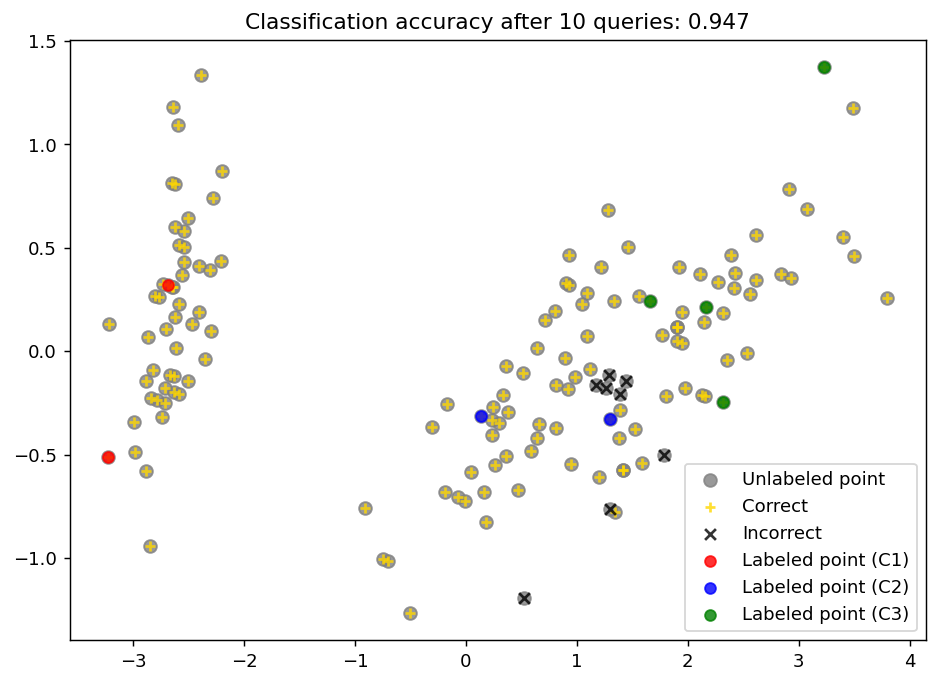

Accuracy after query 5: 0.9467
[[0.59  0.23  0.18 ]
 [0.64  0.23  0.13 ]
 [0.61  0.23  0.16 ]
 [0.79  0.15  0.06 ]
 [0.87  0.085 0.045]
 [0.71  0.225 0.065]
 [0.71  0.225 0.065]
 [0.59  0.225 0.185]
 [0.61  0.23  0.16 ]
 [0.795 0.145 0.06 ]
 [0.71  0.225 0.065]
 [0.59  0.23  0.18 ]
 [0.59  0.23  0.18 ]
 [0.825 0.14  0.035]
 [0.87  0.085 0.045]
 [0.79  0.15  0.06 ]
 [0.795 0.16  0.045]
 [0.835 0.105 0.06 ]
 [0.715 0.225 0.06 ]
 [0.79  0.145 0.065]
 [0.79  0.15  0.06 ]
 [0.71  0.225 0.065]
 [0.71  0.225 0.065]
 [0.59  0.23  0.18 ]
 [0.71  0.225 0.065]
 [0.79  0.15  0.06 ]
 [0.71  0.225 0.065]
 [0.64  0.23  0.13 ]
 [0.61  0.23  0.16 ]
 [0.715 0.225 0.06 ]
 [0.865 0.085 0.05 ]
 [0.86  0.105 0.035]
 [0.61  0.23  0.16 ]
 [0.64  0.23  0.13 ]
 [0.785 0.175 0.04 ]
 [0.79  0.15  0.06 ]
 [0.59  0.23  0.18 ]
 [0.71  0.225 0.065]
 [0.79  0.15  0.06 ]
 [0.585 0.23  0.185]
 [0.64  0.23  0.13 ]
 [0.79  0.15  0.06 ]
 [0.835 0.105 0.06 ]
 [0.59  0.23  0.18 ]
 [0.835 0.105 0.06 ]
 [0.64  0.23  0.13 ]
 [0

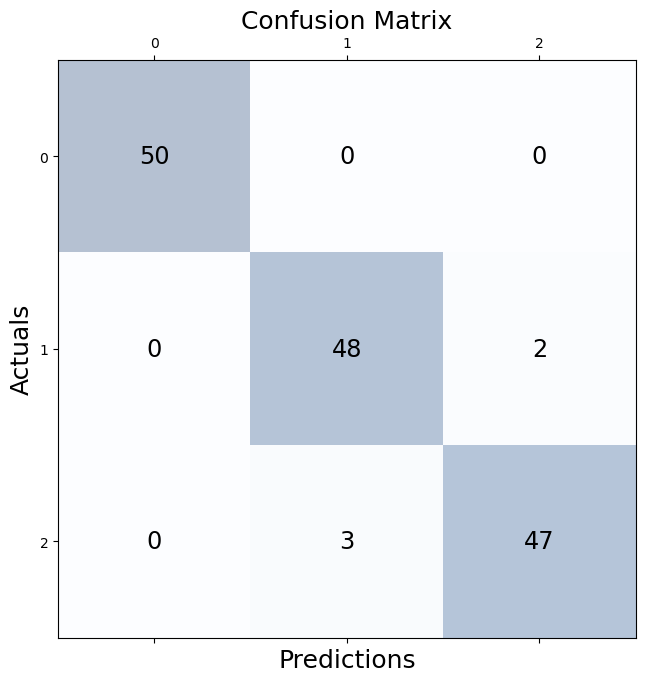

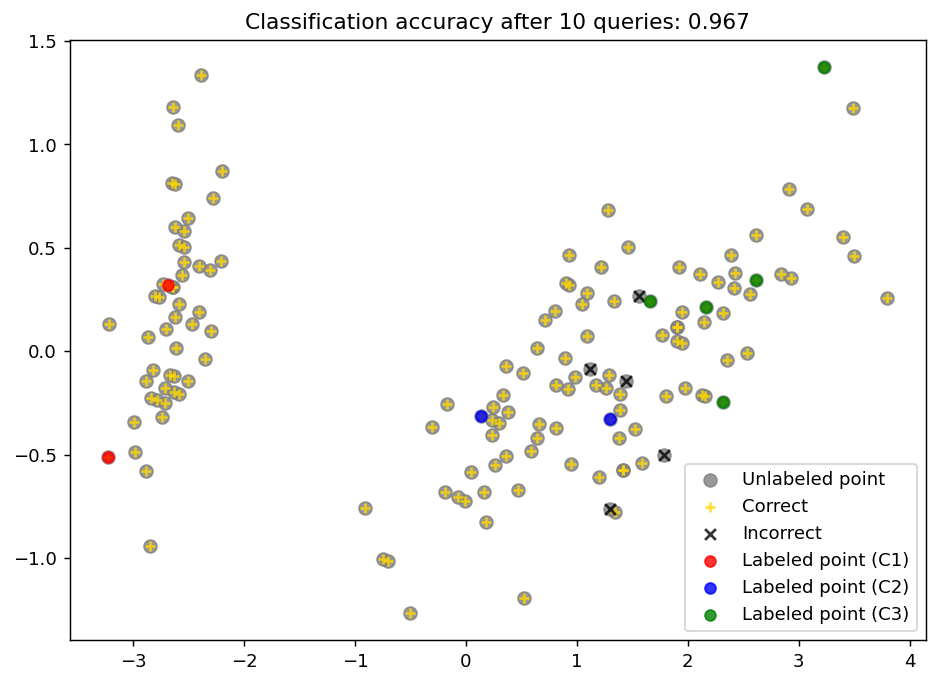

Accuracy after query 6: 0.9667
[[0.56   0.34   0.1   ]
 [0.61   0.3    0.09  ]
 [0.605  0.3    0.095 ]
 [0.775  0.165  0.06  ]
 [0.865  0.115  0.02  ]
 [0.655  0.27   0.075 ]
 [0.655  0.27   0.075 ]
 [0.56   0.34   0.1   ]
 [0.605  0.3    0.095 ]
 [0.79   0.185  0.025 ]
 [0.655  0.27   0.075 ]
 [0.56   0.34   0.1   ]
 [0.56   0.34   0.1   ]
 [0.835  0.15   0.015 ]
 [0.865  0.115  0.02  ]
 [0.79   0.185  0.025 ]
 [0.82   0.165  0.015 ]
 [0.85   0.13   0.02  ]
 [0.665  0.31   0.025 ]
 [0.79   0.185  0.025 ]
 [0.775  0.165  0.06  ]
 [0.665  0.31   0.025 ]
 [0.655  0.27   0.075 ]
 [0.56   0.34   0.1   ]
 [0.655  0.27   0.075 ]
 [0.79   0.185  0.025 ]
 [0.665  0.31   0.025 ]
 [0.61   0.3    0.09  ]
 [0.605  0.3    0.095 ]
 [0.665  0.31   0.025 ]
 [0.865  0.115  0.02  ]
 [0.86   0.12   0.02  ]
 [0.605  0.3    0.095 ]
 [0.61   0.3    0.09  ]
 [0.785  0.195  0.02  ]
 [0.775  0.165  0.06  ]
 [0.56   0.34   0.1   ]
 [0.665  0.31   0.025 ]
 [0.775  0.165  0.06  ]
 [0.55   0.35   0.1   ]
 [0.61   

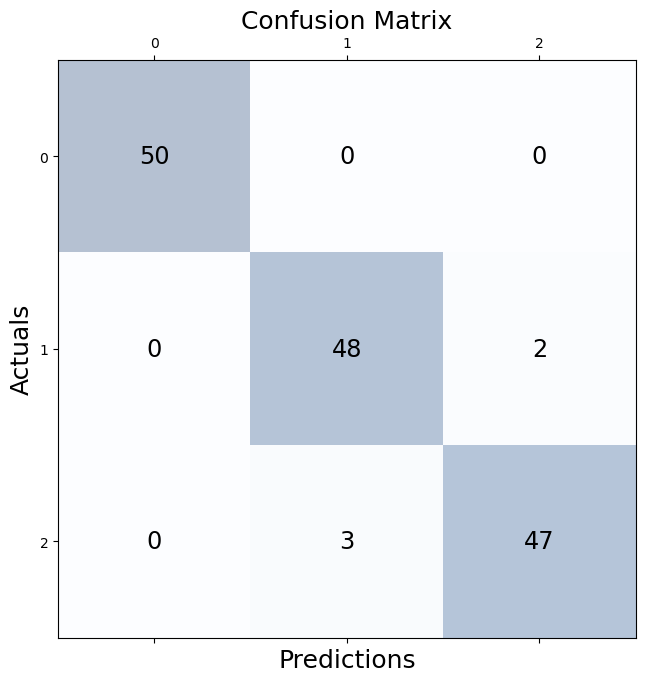

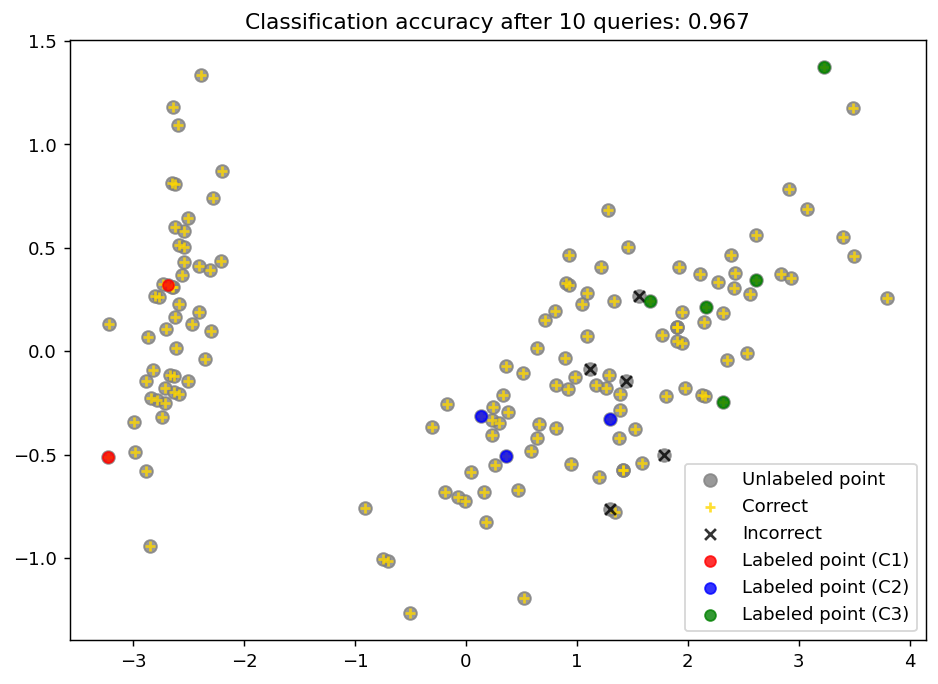

Accuracy after query 7: 0.9667
[[0.775  0.18   0.045 ]
 [0.84   0.125  0.035 ]
 [0.845  0.12   0.035 ]
 [0.875  0.095  0.03  ]
 [0.895  0.09   0.015 ]
 [0.85   0.125  0.025 ]
 [0.81   0.16   0.03  ]
 [0.815  0.145  0.04  ]
 [0.805  0.155  0.04  ]
 [0.885  0.1    0.015 ]
 [0.81   0.16   0.03  ]
 [0.775  0.18   0.045 ]
 [0.815  0.145  0.04  ]
 [0.855  0.13   0.015 ]
 [0.895  0.09   0.015 ]
 [0.885  0.1    0.015 ]
 [0.85   0.135  0.015 ]
 [0.89   0.095  0.015 ]
 [0.82   0.165  0.015 ]
 [0.885  0.1    0.015 ]
 [0.91   0.065  0.025 ]
 [0.82   0.165  0.015 ]
 [0.81   0.16   0.03  ]
 [0.775  0.18   0.045 ]
 [0.81   0.16   0.03  ]
 [0.885  0.1    0.015 ]
 [0.82   0.165  0.015 ]
 [0.84   0.125  0.035 ]
 [0.805  0.155  0.04  ]
 [0.82   0.165  0.015 ]
 [0.895  0.09   0.015 ]
 [0.875  0.11   0.015 ]
 [0.805  0.155  0.04  ]
 [0.8    0.16   0.04  ]
 [0.865  0.12   0.015 ]
 [0.875  0.095  0.03  ]
 [0.815  0.145  0.04  ]
 [0.82   0.165  0.015 ]
 [0.875  0.095  0.03  ]
 [0.84   0.125  0.035 ]
 [0.875  

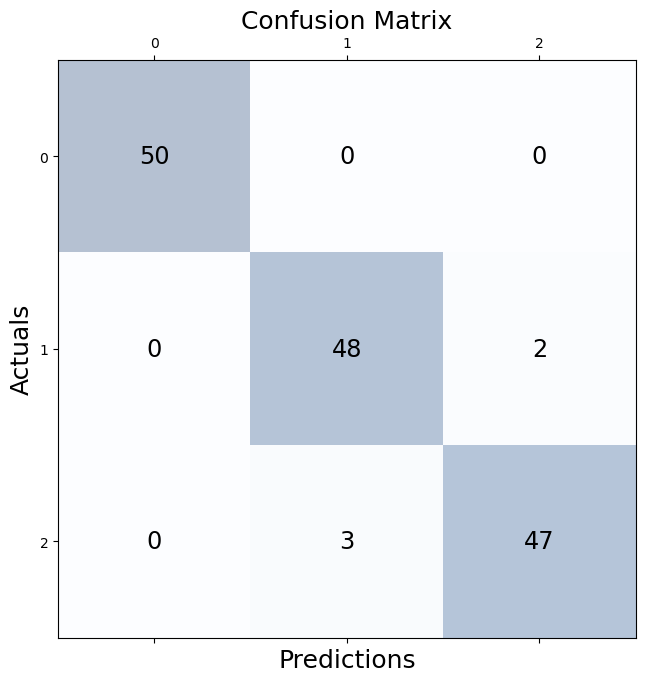

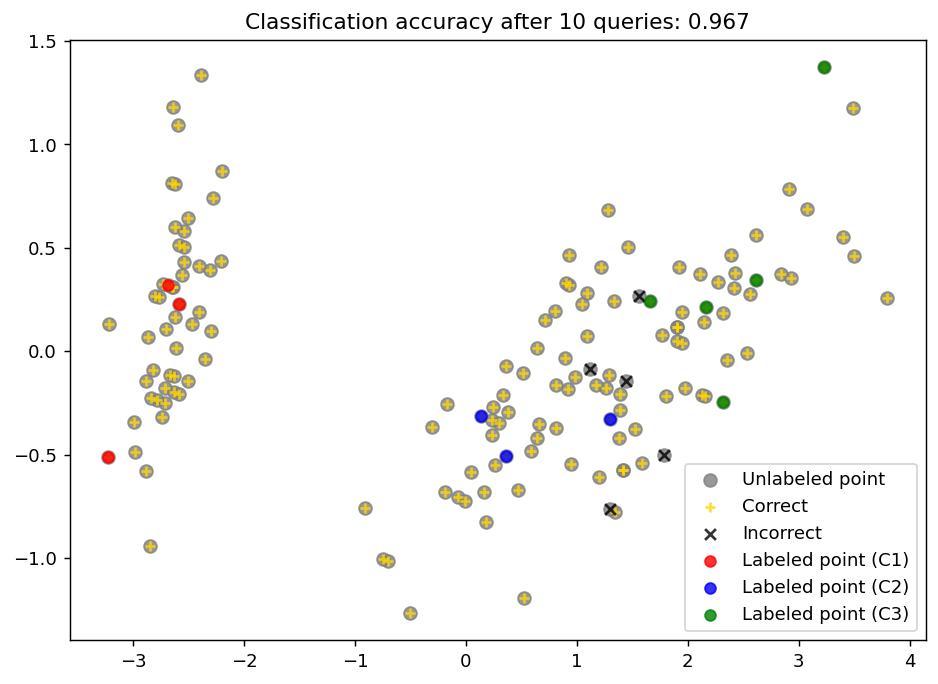

Accuracy after query 8: 0.9667
[[0.775  0.185  0.04  ]
 [0.865  0.1    0.035 ]
 [0.865  0.1    0.035 ]
 [0.885  0.11   0.005 ]
 [0.895  0.1    0.005 ]
 [0.87   0.105  0.025 ]
 [0.81   0.185  0.005 ]
 [0.845  0.12   0.035 ]
 [0.795  0.165  0.04  ]
 [0.885  0.11   0.005 ]
 [0.8    0.17   0.03  ]
 [0.775  0.185  0.04  ]
 [0.845  0.12   0.035 ]
 [0.88   0.115  0.005 ]
 [0.895  0.1    0.005 ]
 [0.885  0.11   0.005 ]
 [0.875  0.12   0.005 ]
 [0.89   0.105  0.005 ]
 [0.81   0.185  0.005 ]
 [0.885  0.11   0.005 ]
 [0.925  0.055  0.02  ]
 [0.81   0.185  0.005 ]
 [0.8    0.17   0.03  ]
 [0.78   0.205  0.015 ]
 [0.81   0.185  0.005 ]
 [0.885  0.11   0.005 ]
 [0.81   0.185  0.005 ]
 [0.865  0.1    0.035 ]
 [0.795  0.165  0.04  ]
 [0.81   0.185  0.005 ]
 [0.895  0.1    0.005 ]
 [0.885  0.11   0.005 ]
 [0.795  0.165  0.04  ]
 [0.805  0.18   0.015 ]
 [0.875  0.12   0.005 ]
 [0.875  0.1    0.025 ]
 [0.845  0.12   0.035 ]
 [0.81   0.185  0.005 ]
 [0.885  0.11   0.005 ]
 [0.865  0.1    0.035 ]
 [0.845  

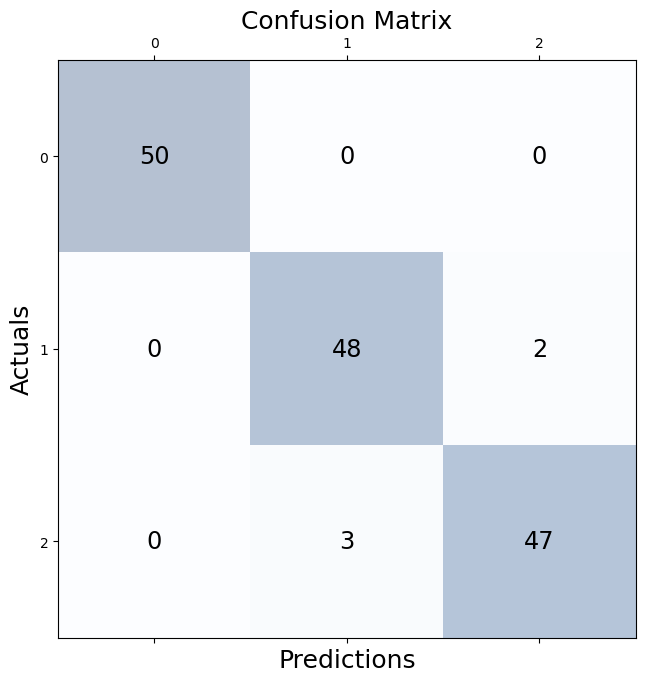

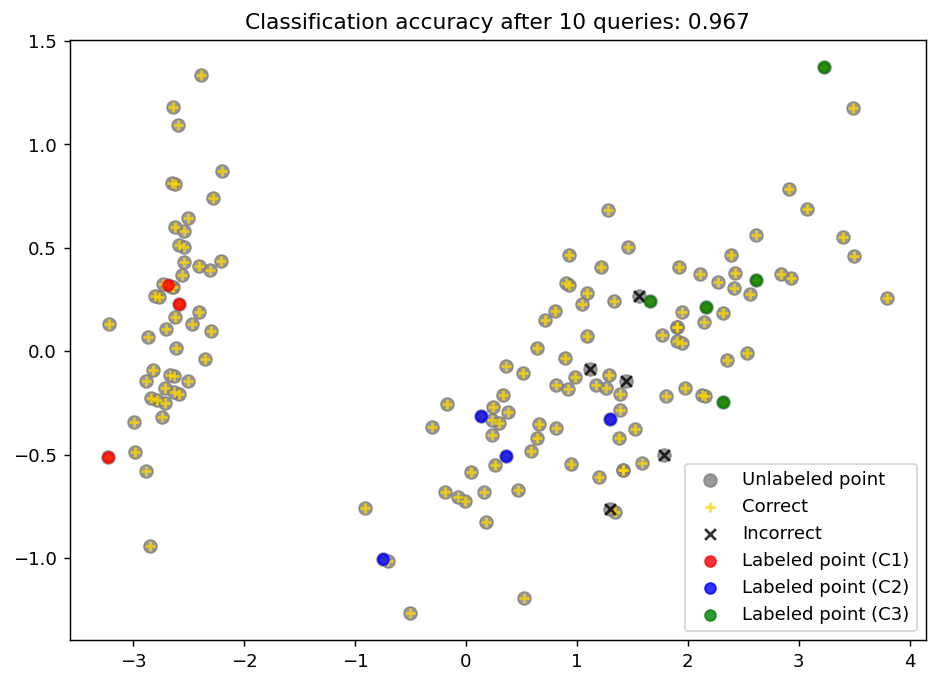

Accuracy after query 9: 0.9667
[[0.77   0.19   0.04  ]
 [0.83   0.14   0.03  ]
 [0.83   0.14   0.03  ]
 [0.875  0.125  0.    ]
 [0.895  0.105  0.    ]
 [0.845  0.13   0.025 ]
 [0.785  0.215  0.    ]
 [0.83   0.135  0.035 ]
 [0.77   0.195  0.035 ]
 [0.87   0.13   0.    ]
 [0.785  0.185  0.03  ]
 [0.77   0.19   0.04  ]
 [0.83   0.135  0.035 ]
 [0.88   0.12   0.    ]
 [0.895  0.105  0.    ]
 [0.87   0.13   0.    ]
 [0.865  0.135  0.    ]
 [0.88   0.12   0.    ]
 [0.78   0.22   0.    ]
 [0.87   0.13   0.    ]
 [0.915  0.07   0.015 ]
 [0.77   0.23   0.    ]
 [0.785  0.185  0.03  ]
 [0.77   0.22   0.01  ]
 [0.785  0.215  0.    ]
 [0.87   0.13   0.    ]
 [0.78   0.22   0.    ]
 [0.83   0.14   0.03  ]
 [0.77   0.195  0.035 ]
 [0.78   0.22   0.    ]
 [0.895  0.105  0.    ]
 [0.885  0.115  0.    ]
 [0.77   0.195  0.035 ]
 [0.77   0.225  0.005 ]
 [0.86   0.14   0.    ]
 [0.875  0.105  0.02  ]
 [0.83   0.135  0.035 ]
 [0.78   0.22   0.    ]
 [0.875  0.125  0.    ]
 [0.83   0.14   0.03  ]
 [0.835  

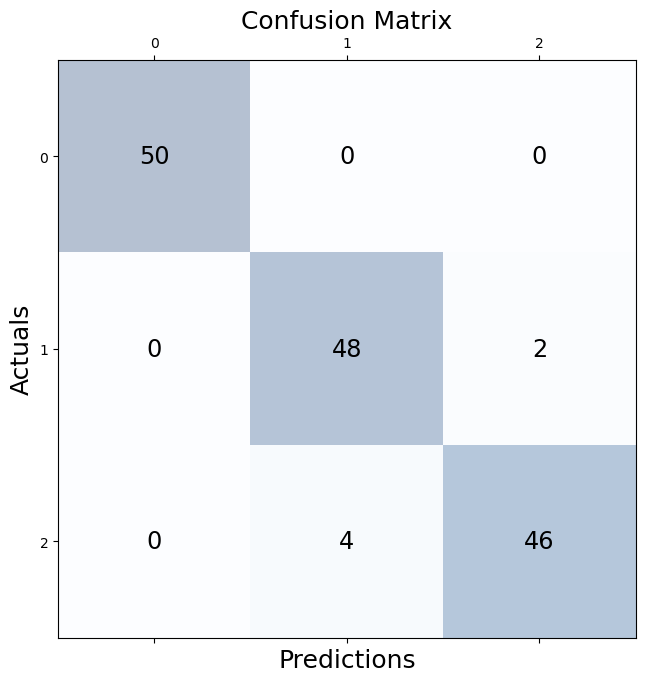

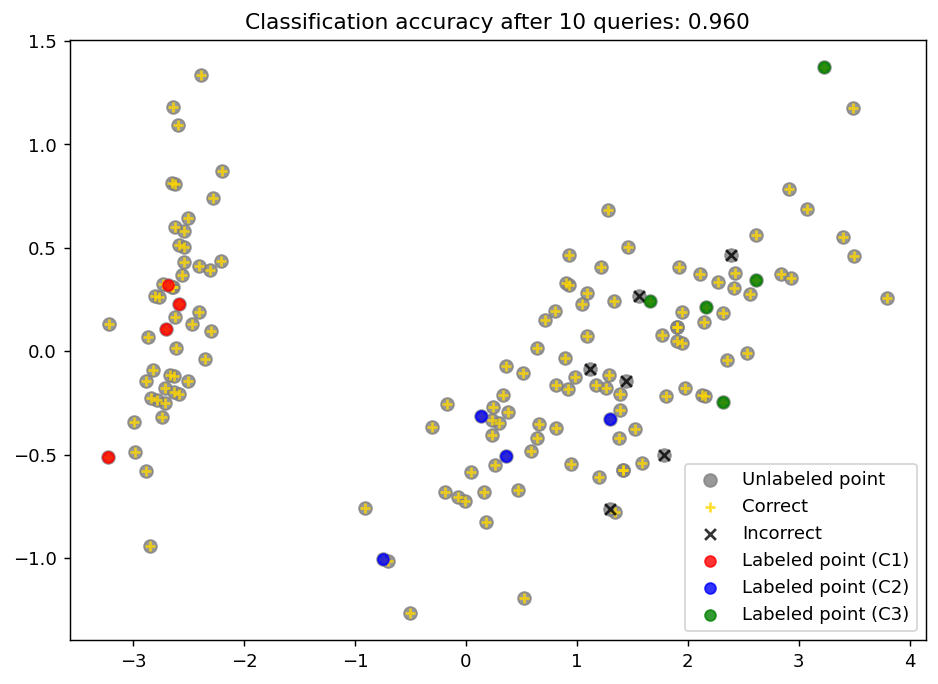

Accuracy after query 10: 0.9600


In [10]:
N_QUERIES = 10
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
    X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
    # add the new labeled point to the training data
    training_indices=np.append(training_indices,query_index)
    X_train=np.concatenate((X_train,X),axis=0)
    y_train= np.append(y_train,y)
    # Remove the queried instance from the unlabeled pool.
    X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
    clf.fit(X_train, y_train) 
    predictions = clf.predict(X_raw) 
    unqueried_score= np.array(accuracy_score(predictions, y_raw))
    predicted_probs = clf.predict_proba(X_pool) 
    print(predicted_probs) 
    entropy_array = entr(predicted_probs).sum(axis=1)
    query_index, value = max(enumerate(entropy_array), key=operator.itemgetter(1))
    print('The most uncertain point is No.', query_index)    # Calculate and report our model's accuracy.
    conf_matrix=confusion_matrix(y_raw, predictions)
    PlotConfMatrix(conf_matrix, 'Confusion_Matrix', index+1) 

    # Save our model's performance for plotting.
    performance_history.append(unqueried_score)    
    is_correct = (predictions == y_raw)
    
    # Plot our updated classification results once we've trained our learner.
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.scatter(x_component, y_component, color='gray',s=50, alpha=8/10, label='Unlabeled point')
    plt.scatter(x=x_component[is_correct],  y=y_component[is_correct],  color='gold', marker='+', label='Correct',   alpha=8/10)
    plt.scatter(x=x_component[~is_correct], y=y_component[~is_correct], color='black', marker='x', label='Incorrect', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==0]] , y=y_component[training_indices[y_raw[training_indices]==0]], c='red', marker='o', label='Labeled point (C1)', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==1]] , y=y_component[training_indices[y_raw[training_indices]==1]], c='blue', marker='o', label='Labeled point (C2)', alpha=8/10)
    plt.scatter(x=x_component[training_indices[y_raw[training_indices]==2]] , y=y_component[training_indices[y_raw[training_indices]==2]], c='green', marker='o', label='Labeled point (C3)', alpha=8/10)
    plt.title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=N_QUERIES, final_acc=performance_history[-1]))
    plt.legend(loc='lower right')
    FileName='SelectedPerformance'    
    plt.savefig(FileName + str(index+1)+  '.svg')
    plt.savefig(FileName + str(index+1)+  '.pdf')
    plt.show()
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=unqueried_score))
    #input("Press Enter to continue...")

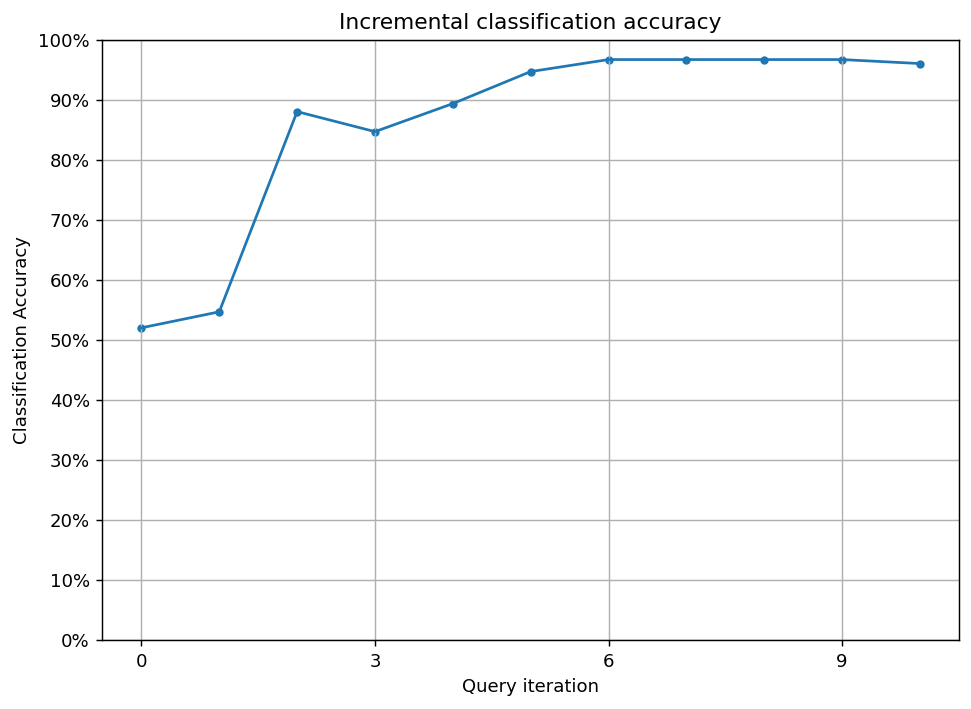

In [11]:
# Plot our performance over time (accuracy vs. number of annotated points)
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.set_ylim(bottom=0, top=1)
ax.grid(True)
ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
plt.savefig('FinalAcc.svg')
plt.savefig('FinalAcc.pdf')
plt.show()